In this project, we will be illustrating how to apply K Means algorithm to a dataset. We here have a data of customers who buy things at a mall.In the data set there are information like Gender, Age, Income and Spending Score. We will implement K means clustering on the data and then see what conclusion we can arrive at. We will be covering following things:

1.Exploring the Dataset

2.Vizualizing the Data Set 

3.K Means Algorithm | Elbow Method | Customer Segmentation 

4.Relation between Age and Spending Score 

5.Relation between Age and Income

6.Relation between Age,Annual Income and Spending Score


# 1.Importing and Exploring Data

**Importing the Python modules**

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import warnings 
import seaborn as sns
import plotly.express as px
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

**Importing the dataset**

In [37]:
df=pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


So in the data set we have the Customer Id, Genre, Age, Annual Income and the Spending Score of the customer making purchase at the mall. Spending score of 1 means less purchase and 100 means more purchase being done by the customer

**Exploring the data set**

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


1.Mean Age of the cusomers is 38.85 

2.Mean Annual Income 200 $

3.Mean Spening Score is 50.20

### Getting Mean Values 

In [39]:
df_desc=df.describe()
df_desc.loc['mean']

CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
Name: mean, dtype: float64

### Checking for Null Values

In [40]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Checking for Outliers

**Method 1: Using Box Plot**

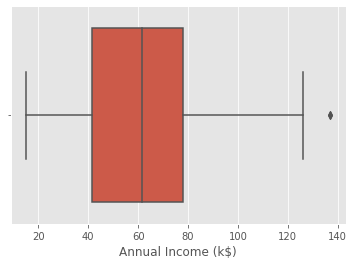

In [41]:
sns.boxplot(x = df['Annual Income (k$)'])

Only one outlier point at 140K

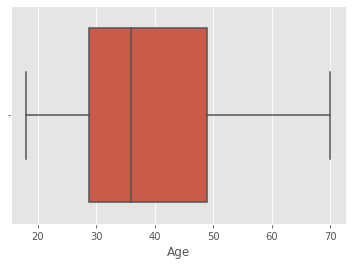

In [42]:
sns.boxplot(x = df['Age'])

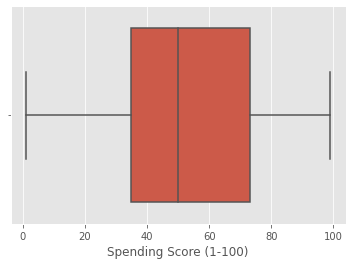

In [43]:
sns.boxplot(x = df['Spending Score (1-100)'])

**Method 2: Interquartile Range**

Getting only the numeric data

In [44]:
df1 = df._get_numeric_data()

IQR is difference between 75th and 25th percentiles, which is the upper and lower quartiles, Q3-Q1

In [45]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64


In [46]:
print((df1 < (Q1 - 1.5*IQR)) | (df1 > (Q3 + 1.5*IQR)))

     CustomerID    Age  Annual Income (k$)  Spending Score (1-100)
0         False  False               False                   False
1         False  False               False                   False
2         False  False               False                   False
3         False  False               False                   False
4         False  False               False                   False
..          ...    ...                 ...                     ...
195       False  False               False                   False
196       False  False               False                   False
197       False  False               False                   False
198       False  False                True                   False
199       False  False                True                   False

[200 rows x 4 columns]


### Treating the Outliers found via IQR

In [47]:
df_out = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [48]:
df2 = pd.merge(df_out, df[['CustomerID','Gender']], on="CustomerID", how = "left")
df2.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender
0,1,19,15,39,Male
1,2,21,15,81,Male
2,3,20,16,6,Female
3,4,23,16,77,Female
4,5,31,17,40,Female


# 2.Data Vizualization 

### Mean Plot 

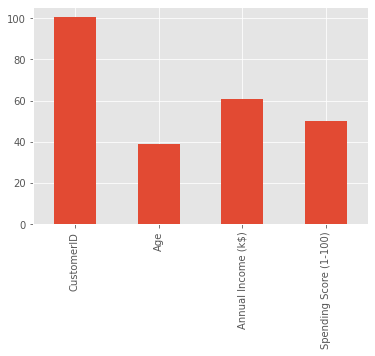

In [49]:
df_desc.loc['mean'].plot.bar()
plt.show()

Mean of customerID is not important as the value doesn't have any significance.

This plot would be very useful to compare the features which have same units.

### Histogram

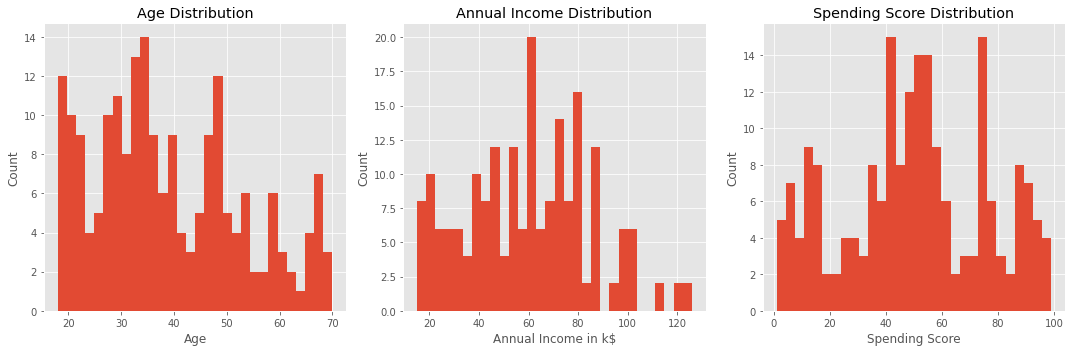

In [50]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1,)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.hist(df2.Age,bins=30)

plt.subplot(1,3,2)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income in k$')
plt.ylabel('Count')
plt.hist(df2['Annual Income (k$)'],bins=30)

plt.subplot(1,3,3)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.hist(df2['Spending Score (1-100)'],bins=30)

plt.tight_layout()

pass


From the histograms we can observe following things:

1.More people in the dataset are in age group 30-35 

2.More people have income in the range 60-80 k$

3.Genrally, the Spending score is in the range 40-60

### Distribution plot

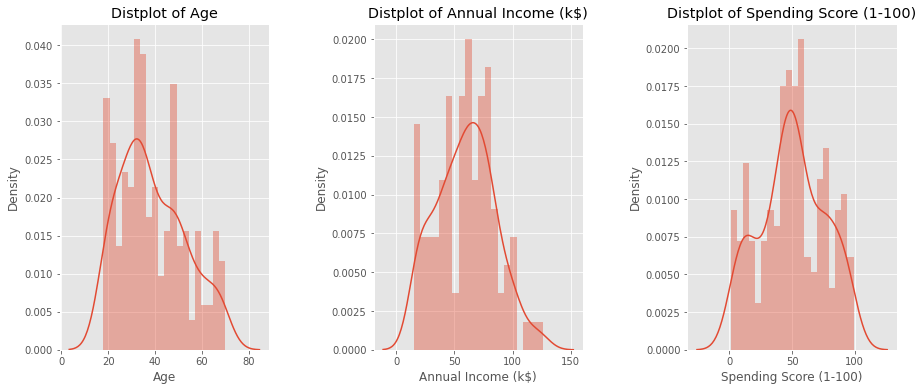

In [51]:
plt.figure(1,figsize=(15,6))
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(df2[x],bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show()

We can see that Age, Annual Income and Spending Score are Normally Distributed.

### Scatter Plot

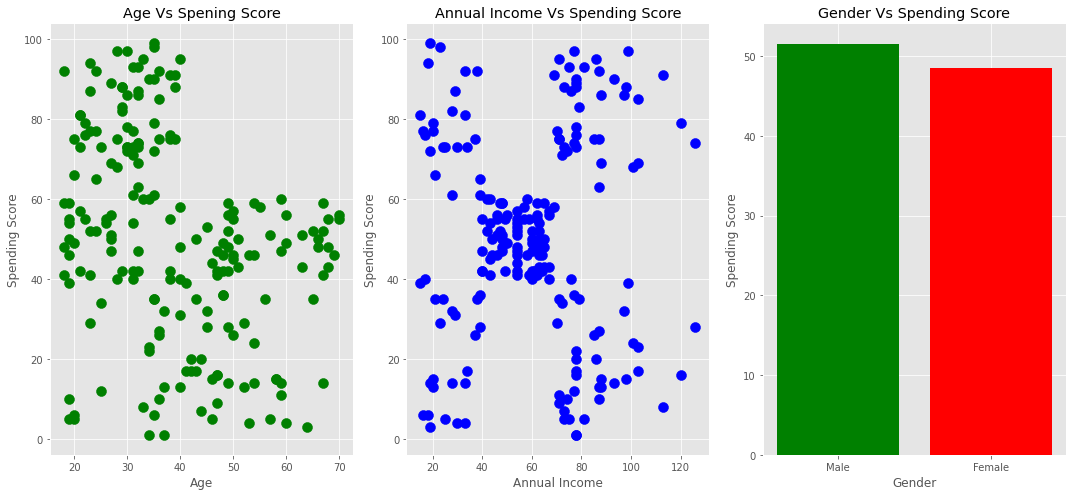

In [52]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1,)
plt.title('Age Vs Spening Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.scatter(df2['Age'],df2['Spending Score (1-100)'],s=100,c='g')

plt.subplot(1,3,2)
plt.title('Annual Income Vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],s=100,c='b')

colors = ['g','r','m','b']

plt.subplot(1,3,3,)
plt.title('Gender Vs Spending Score')
plt.xlabel('Gender')
plt.ylabel('Spending Score')
cat_list=df['Gender'].unique()
cat_average=df2.groupby('Gender').mean()['Spending Score (1-100)']
plt.bar(cat_list,cat_average,color=colors)

plt.tight_layout()

pass

We can observe following things:

Annual income gives a better clustering of the dataset 

People in age group 20-40 spend more.After 40 the overall spending levels are lower.

Annual Income tells us that there are 5 different groups of people in our dataset.

Men Spend more than women.

### Relation of between Age,Annual Income and Spending Score

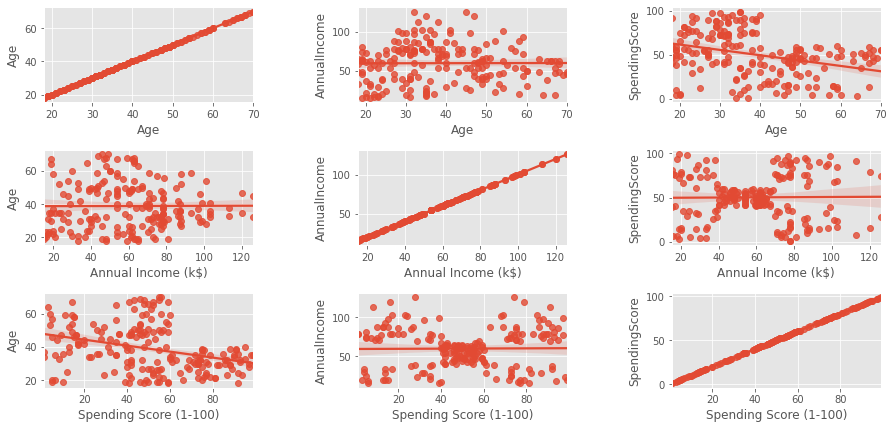

In [53]:
plt.figure(1,figsize=(15,7))
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    for y in ['Age','Annual Income (k$)','Spending Score (1-100)']:
        n+=1
        plt.subplot(3,3,n)
        plt.subplots_adjust(hspace=0.5,wspace=0.5)
        sns.regplot(x=x,y=y,data=df2)
        plt.ylabel(y.split()[0]+''+y.split()[1] if len(y.split())>1 else y)
plt.show()

We can Observe Following things 

1.With age the spending score reduces.This is because as people grow older they have responsibilities like family.So they tend to reduce their spending at the mall.

2.People tend to earn more in the age group of 30-40.This could be becaue many people reach their peak in 30s and 40s.

3.There is no clear relation beween Annual Income and the Spending Score.For this we can get a better interperation by doing a clustering on the data.

# 3.K Means Clustering

### Matrix of Features

In [54]:
X=df2.iloc[:,[2,3]].values # We are considering Annual income and Spending Score as the features 

K Means clustering is an unsupervised learning algorithm.So there is no need to specify target variable.The algorithm with do a clustring and give us a result.

### Elbow Curve

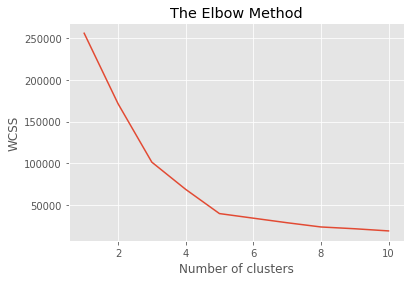

In [55]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Elbow curve is the plot of Sum of square distance of the points from the cluster center.As the number of cluster increases the value of WCSS decreases.To find the optimum number of clusters we have to look at the elbow region of the Elbow curve.The cluster number after which there is not much further decrease in WCSS value should be choosen as the optimum number of cluster for a K Means Algorithm.In this particular case from the Elbow curve we can opt the optimum value of clusters to be 5.

### K Means Cluster

In [56]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)

### Visualizing the Cluster 

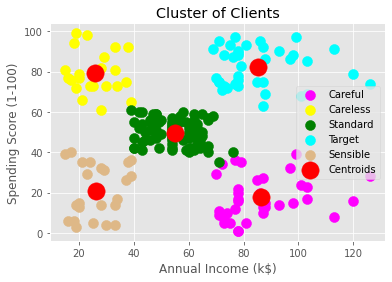

In [57]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='magenta',label='Careful')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='yellow',label='Careless')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Standard')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='Target')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='burlywood',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
pass

Cluster 1- High income low spending = Careful

Cluster 2- Medium income medium spending =Standard

Cluster 3- High Income and high spending =Target

Cluster 4- Low Income and high spending =Careless

Cluster 5- Low Income and low spending =Sensible

# 4.Relation Between Age and Spending Score 

### Generating Matrix Of Features 

In [58]:
X1=df2.iloc[:,[1,3]].values # We are considering Age and Spending Score as the features 
#X1

### Using Elbow method to find the optiminal cluster number

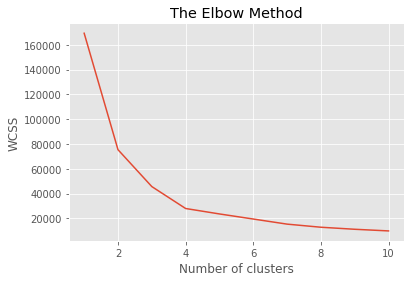

In [59]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the elbow plot we can see that we can get best result by considering four clusters

### Applying K means to the Dataset

In [60]:
kmeans=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X1)

### Visualizing the clusters

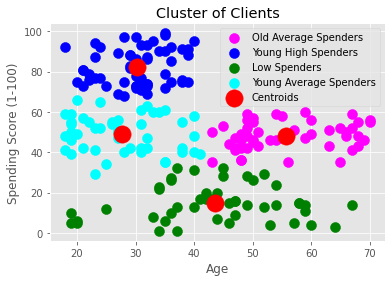

In [61]:
plt.scatter(X1[y_kmeans==0,0],X1[y_kmeans==0,1],s=100,c='magenta',label='Old Average Spenders')
plt.scatter(X1[y_kmeans==1,0],X1[y_kmeans==1,1],s=100,c='blue',label='Young High Spenders')
plt.scatter(X1[y_kmeans==2,0],X1[y_kmeans==2,1],s=100,c='green',label='Low Spenders')
plt.scatter(X1[y_kmeans==3,0],X1[y_kmeans==3,1],s=100,c='cyan',label='Young Average Spenders')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.ioff()
plt.show
pass

So we can cluster the data into four groups.

1.Low spenders

2.Young High Spenders

3.Young Average Spenders

4.Old Average spenders

We can clearly see that Only young people(18-40 age group) are involved in High Spending.As age increases people fall into average or Low spending catogery.

# 5. Relation Between Age and Income

### Creating matrix of features

In [62]:
X2=df2.iloc[:,[1,2]].values # We are considering Age and Annual income as the features 
#X2

### Elbow method to find optimum cluster

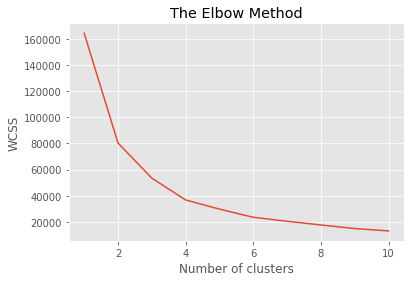

In [63]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


I will be taking 6 as the optimun number of clusters

### Applying K means to the Dataset

In [64]:
kmeans=KMeans(n_clusters=6,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X2)

### Visualizing the clusters

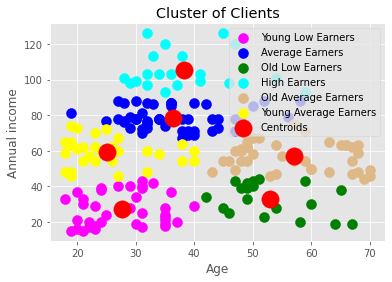

In [65]:
plt.scatter(X2[y_kmeans==0,0],X2[y_kmeans==0,1],s=100,c='magenta',label='Young Low Earners')
plt.scatter(X2[y_kmeans==1,0],X2[y_kmeans==1,1],s=100,c='blue',label='Average Earners')
plt.scatter(X2[y_kmeans==2,0],X2[y_kmeans==2,1],s=100,c='green',label='Old Low Earners')
plt.scatter(X2[y_kmeans==3,0],X2[y_kmeans==3,1],s=100,c='cyan',label='High Earners')
plt.scatter(X2[y_kmeans==4,0],X2[y_kmeans==4,1],s=100,c='burlywood',label='Old Average Earners ')
plt.scatter(X2[y_kmeans==5,0],X2[y_kmeans==5,1],s=100,c='yellow',label='Young Average Earners')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('Age')
plt.ylabel('Annual income')
plt.legend()
plt.ioff()
plt.show
pass

We can see people in age group 0f 30-40 have high number of high income people

# 6.Relation Between Age,Annual Income and Spending Score

###Elbow method to find optimum cluster

In [66]:
X3 = df2[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

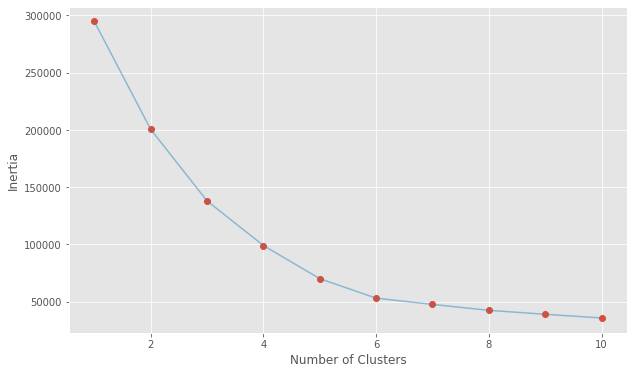

In [67]:
plt.figure(1 , figsize = (10 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

### Applying K means to the Dataset

In [68]:
X3 = df2[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_
df2['label3'] =  labels3

### Visualizing the clusters

In [69]:
fig = px.scatter_3d(df2, x=df2['Age'], y=df2['Spending Score (1-100)'], z=df2['Annual Income (k$)'],
              color=df2['label3'])
fig.show()